In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv', delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [5]:
feature_cols = df.columns.tolist()
feature_cols.remove('Target')

C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


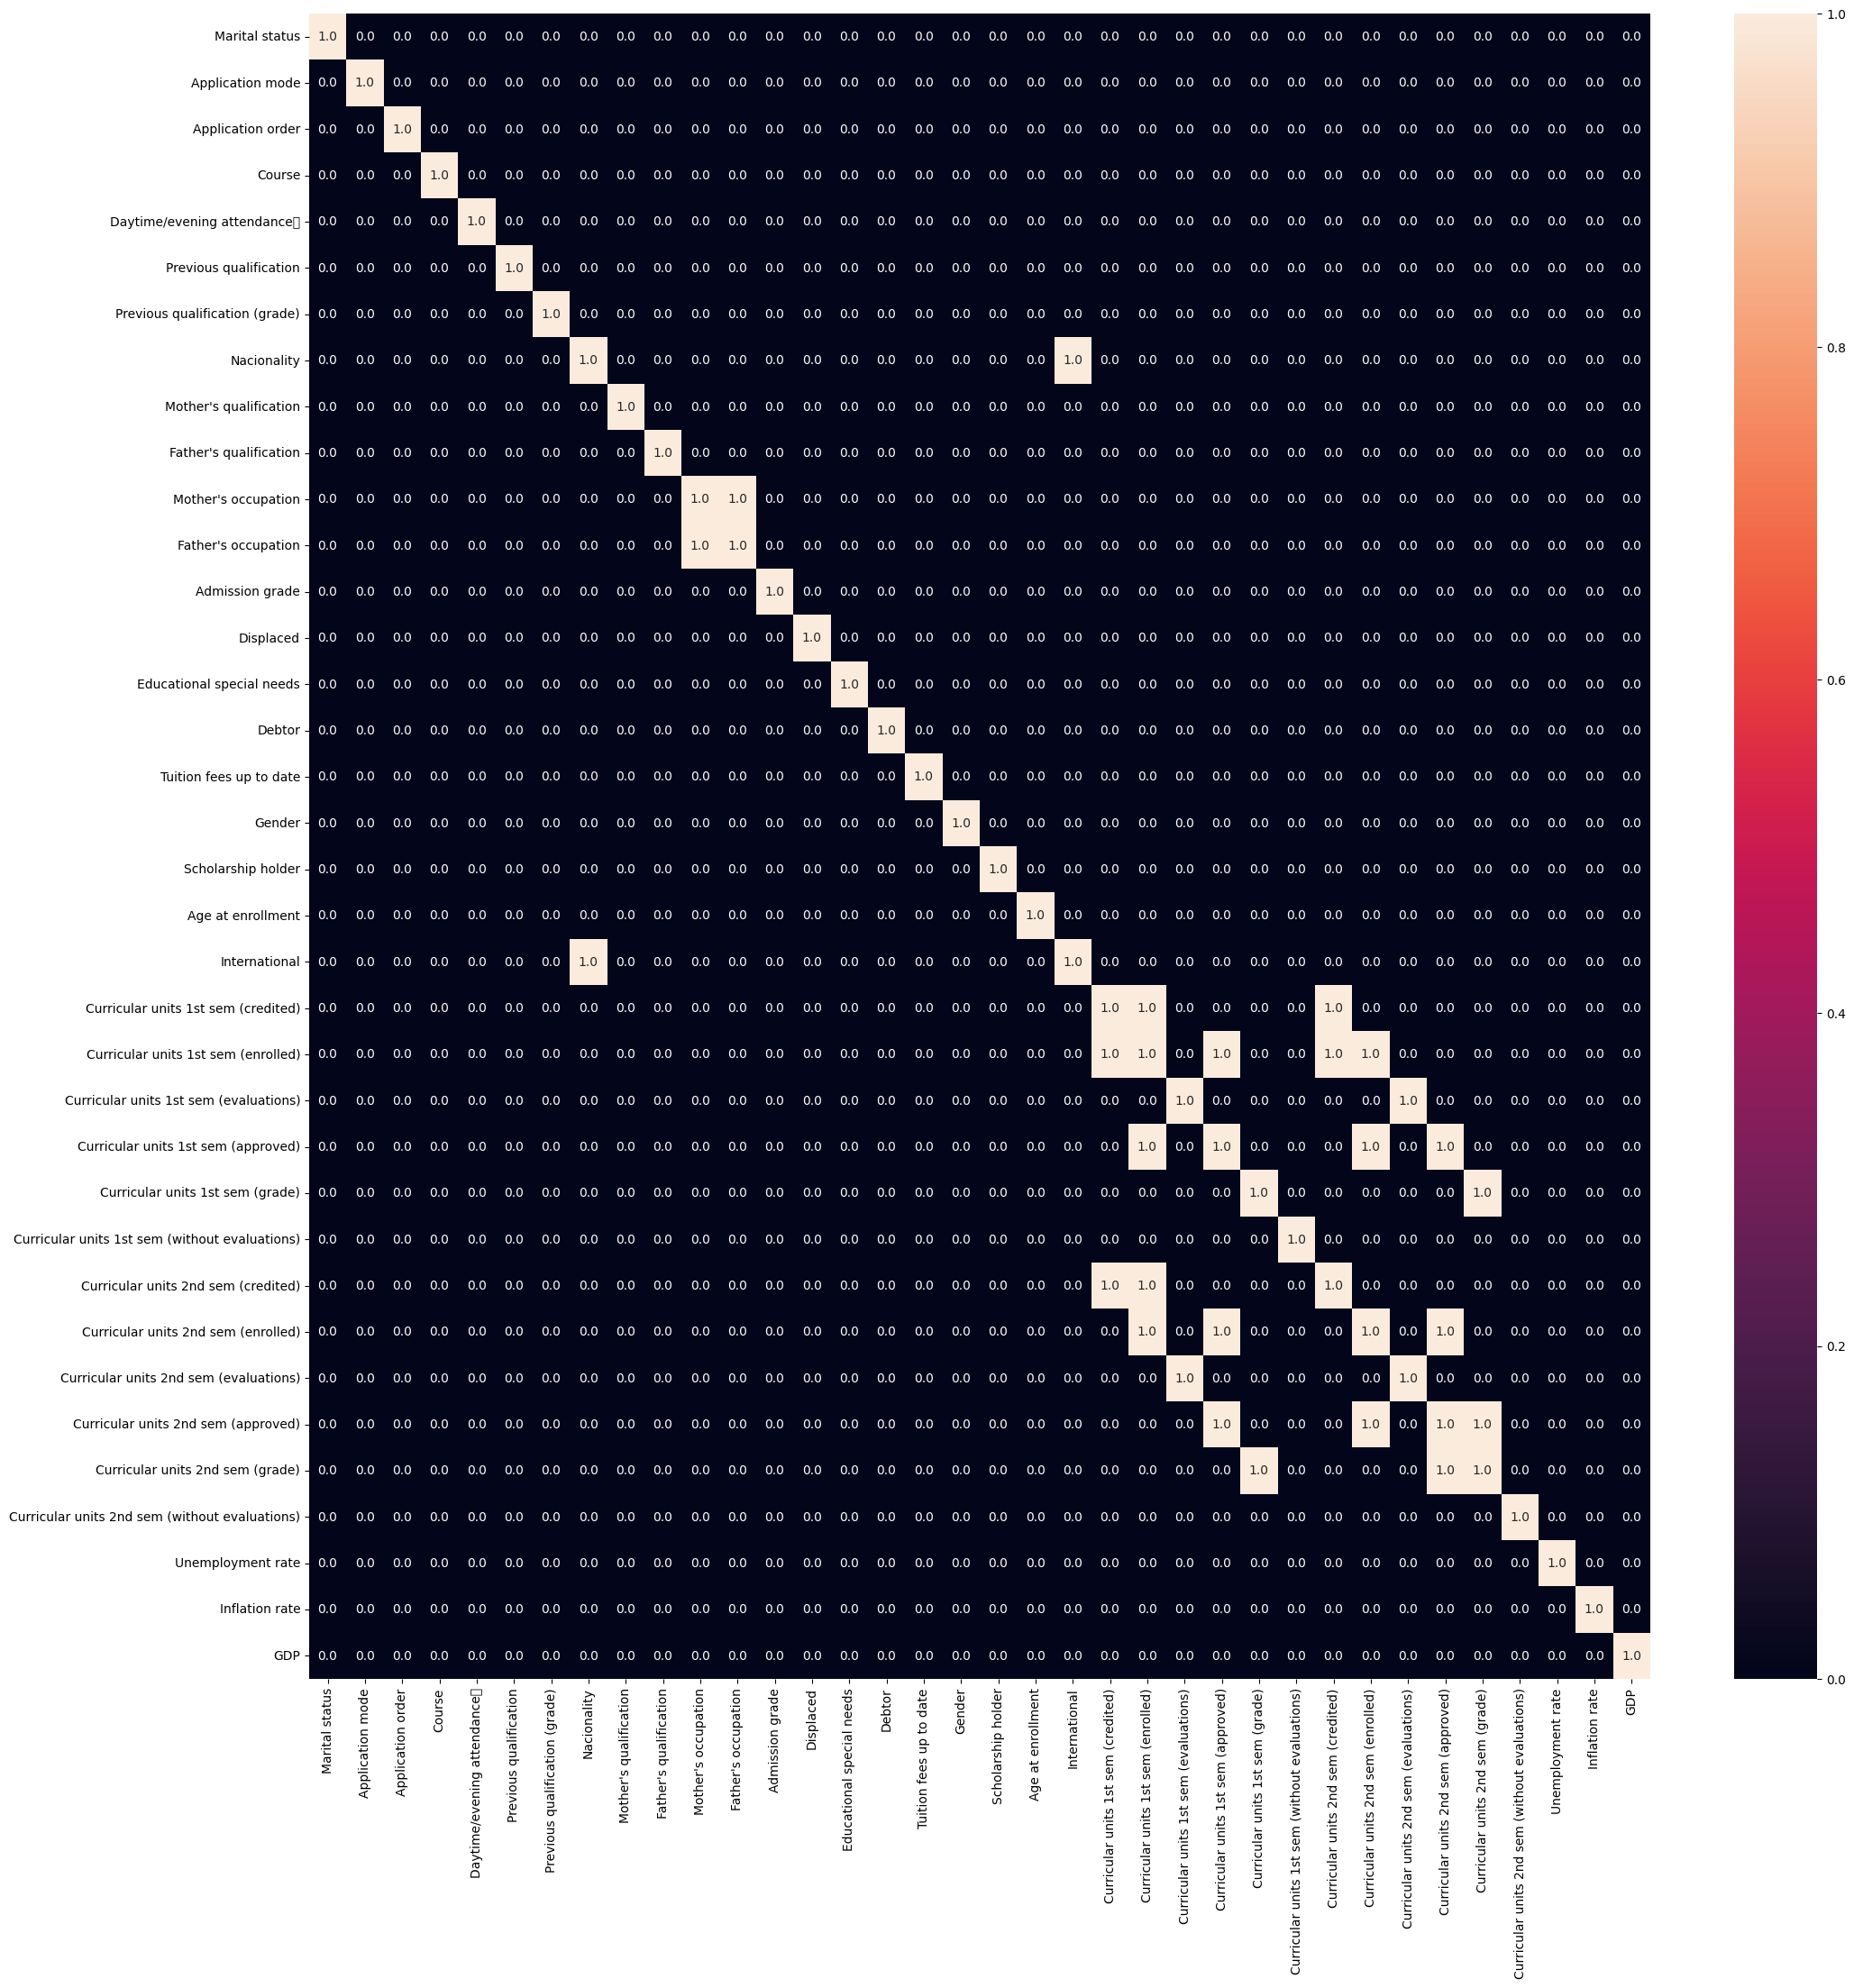

In [8]:
plt.figure(figsize=(24,24))
sns.heatmap(df[feature_cols].corr() > 0.7, fmt='.1f', annot=True)
plt.show()

In [ ]:
cols_remove = ["Mother's occupation", "Curricular units 1st sem (credited)", "Curricular units 2nd sem (approved)"]
for col in cols_remove:
    feature_cols.remove(col)

In [ ]:
import math
fig, axs = plt.subplots(math.ceil(len(feature_cols) / 3), 3, figsize=(16,24))
axs = axs.flat

for i, col in enumerate(feature_cols):
    sns.boxplot(df, x=col, ax=axs[i])
plt.show()

In [12]:
Q1 = df[feature_cols].quantile(0.25)
Q3 = df[feature_cols].quantile(0.75)

lower_limit = Q1 - 1.5 * (Q3 - Q1)
upper_limit = Q1 + 1.5 * (Q3 - Q1)

df[feature_cols] = np.where(df[feature_cols] < lower_limit , Q1, df[feature_cols])
df[feature_cols] = np.where(df[feature_cols] > upper_limit , Q3, df[feature_cols])

In [ ]:
fig, axs = plt.subplots(math.ceil(len(feature_cols) / 3), 3, figsize=(16,24))
axs = axs.flat

for i, col in enumerate(feature_cols):
    sns.boxplot(df, x=col, ax=axs[i])
plt.show()

In [16]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

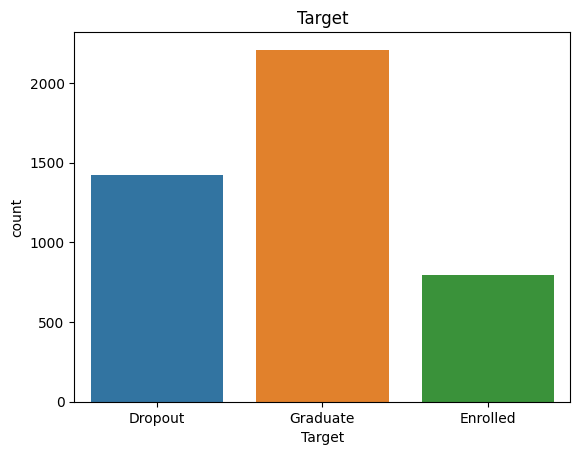

In [17]:
sns.countplot(df, x='Target')
plt.title('Target')
plt.show()

In [15]:
y = df['Target']
X = df[feature_cols].copy()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3539, 36), (885, 36), (3539,), (885,))

In [23]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
}

Accuracy Logistic Regression 0.7672316384180791


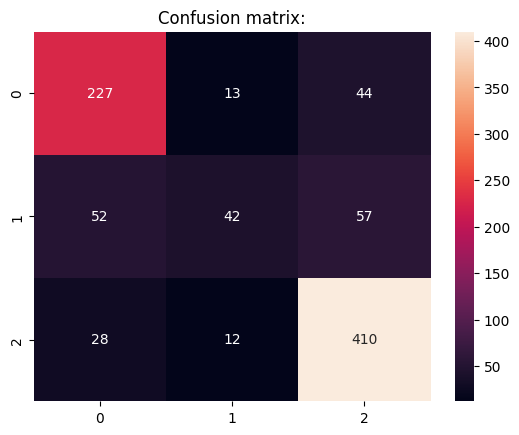

Accuracy Decision Tree 0.672316384180791


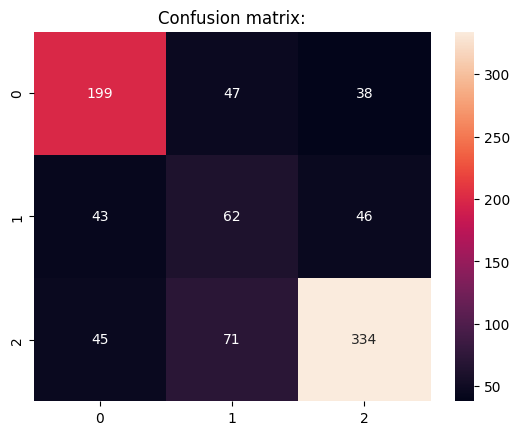

Accuracy SVM 0.7740112994350282


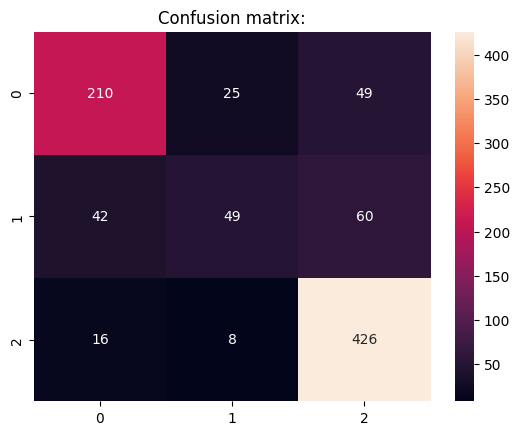

Accuracy Naive bayes 0.7299435028248588


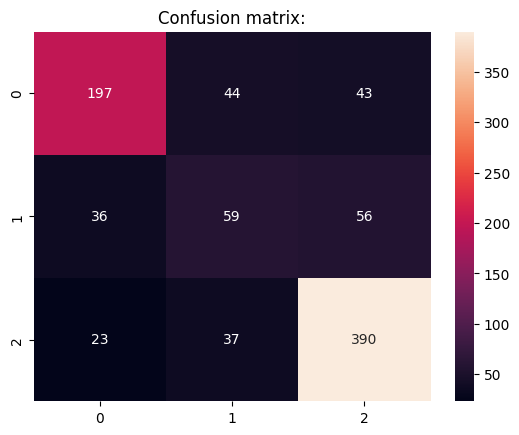

Accuracy Random Forest 0.7932203389830509


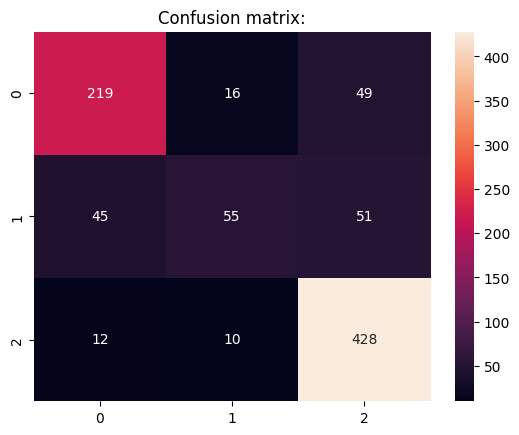

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy "+ model_name , accuracy_score(y_test, pred))
    
    conf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(conf_matrix, fmt='d', annot=True)
    plt.title('Confusion matrix:')
    plt.show()